In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# EDA

In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  str    
dtypes: float64(9), str(1)
memory usage: 1.6 MB


In [4]:
df.dropna(inplace=True)
df.info()

<class 'pandas.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  str    
dtypes: float64(9), str(1)
memory usage: 1.7 MB


In [5]:


# Visualizing geographical distribution of median house values
fig = px.scatter_map(
    df,
    lat="latitude",
    lon="longitude",
    hover_name="ocean_proximity",
    color="median_house_value",
    zoom=6,
    height=600,
    map_style="open-street-map"
)
fig.show()


In [6]:
# Preparing data for modeling

X = df.drop(["median_house_value"], axis=1)
y = df["median_house_value"]

In [7]:
# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
# Combining X_train and y_train back into a single DataFrame for training data

training_data = X_train.join(y_train)
training_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
3185,-119.79,36.30,16.0,1717.0,277.0,903.0,289.0,4.3438,INLAND,93100.0
3358,-120.66,40.41,52.0,2081.0,478.0,1051.0,419.0,2.2992,INLAND,70200.0
1189,-121.52,39.43,15.0,2119.0,389.0,1079.0,374.0,2.3566,INLAND,80400.0
19422,-121.04,37.70,52.0,349.0,59.0,121.0,40.0,3.3036,INLAND,197500.0
5713,-118.25,34.22,34.0,2510.0,535.0,1516.0,542.0,3.8068,<1H OCEAN,267000.0
...,...,...,...,...,...,...,...,...,...,...
13370,-117.54,34.12,4.0,17577.0,2819.0,7766.0,2473.0,5.1333,INLAND,181800.0
5684,-118.28,33.68,8.0,2842.0,522.0,1624.0,510.0,3.7282,NEAR OCEAN,287500.0
12882,-121.34,38.67,34.0,1503.0,264.0,731.0,285.0,4.0352,INLAND,118500.0
9524,-123.17,39.18,14.0,2240.0,327.0,1030.0,308.0,5.9585,<1H OCEAN,214900.0


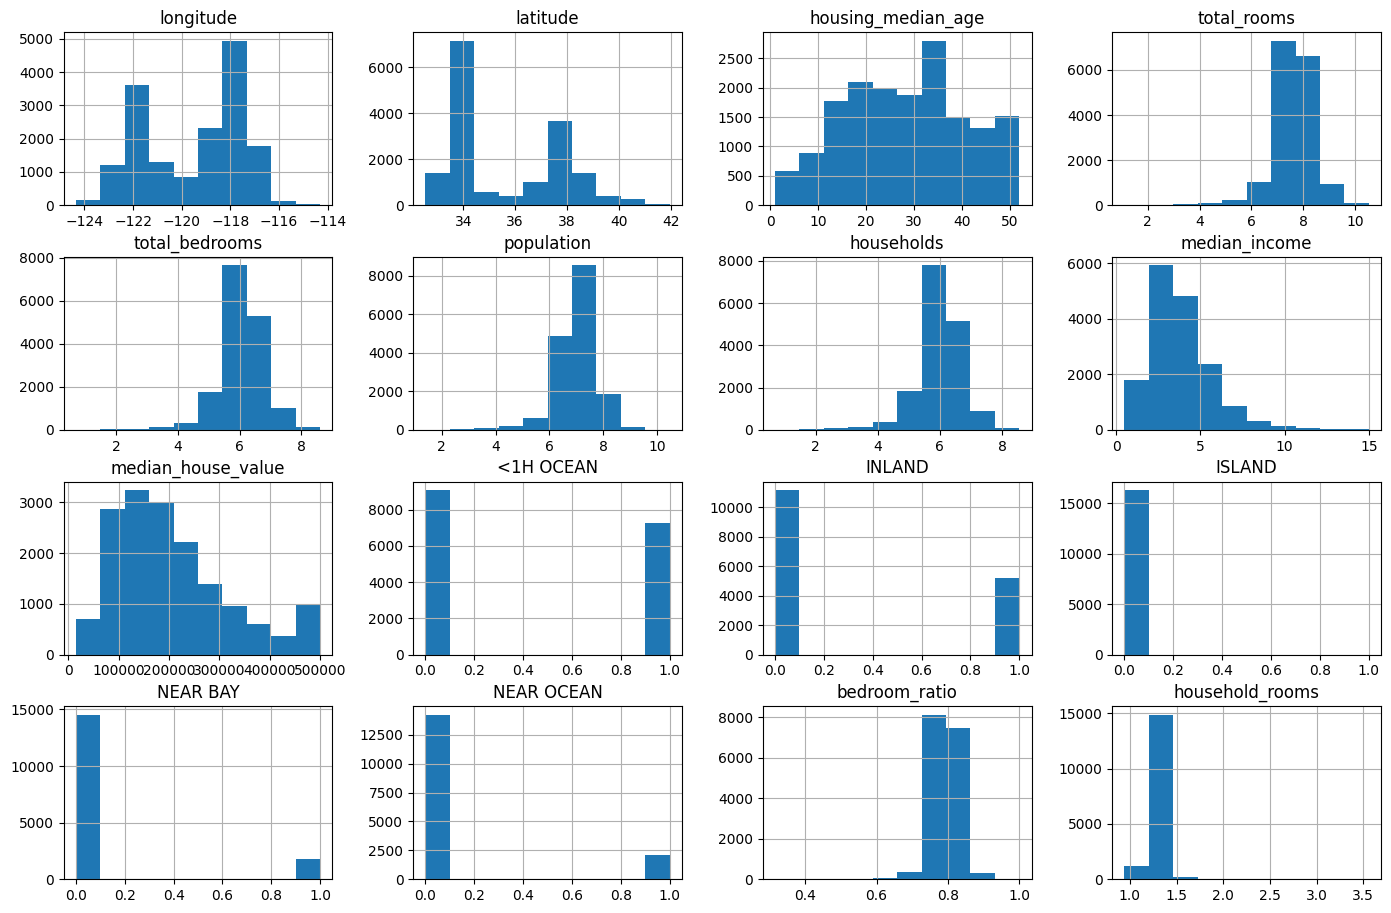

In [39]:
# Visualizing distributions of features in the training data

training_data.hist(figsize=(17,11))
plt.show()

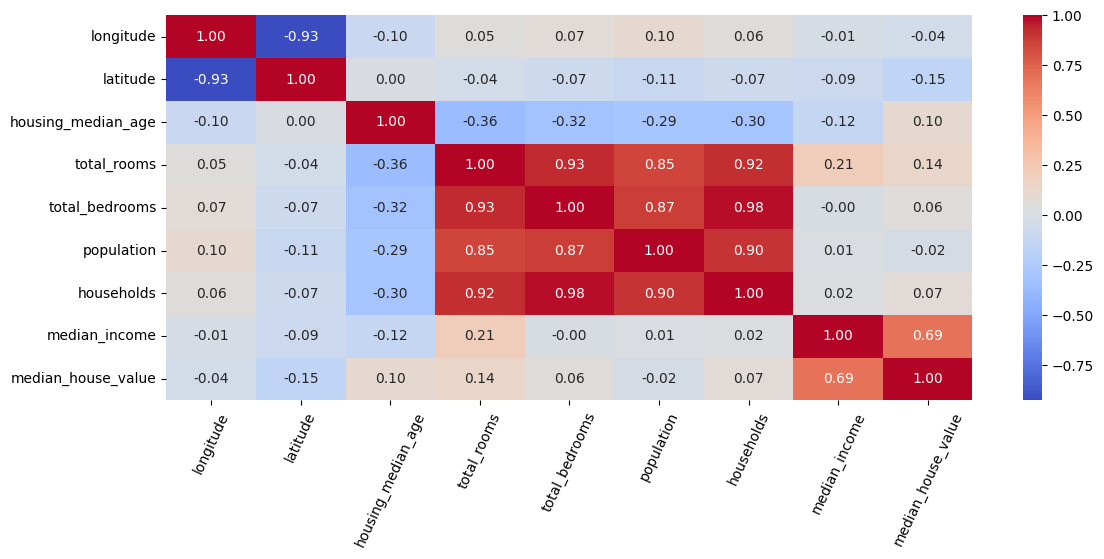

In [10]:
# Correlation heatmap of numerical features in the training data

plt.figure(figsize=(13, 5))
sns.heatmap(training_data.select_dtypes("number").corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.xticks(rotation=65)
plt.show()

# Pre-Processing 

In [11]:
# Use natural logarith to make the distributions more normal

training_data["total_rooms"] = np.log(training_data["total_rooms"] + 1)
training_data["total_bedrooms"] = np.log(training_data["total_bedrooms"] + 1)
training_data["population"] = np.log(training_data["population"] + 1)
training_data["households"] = np.log(training_data["households"] + 1)

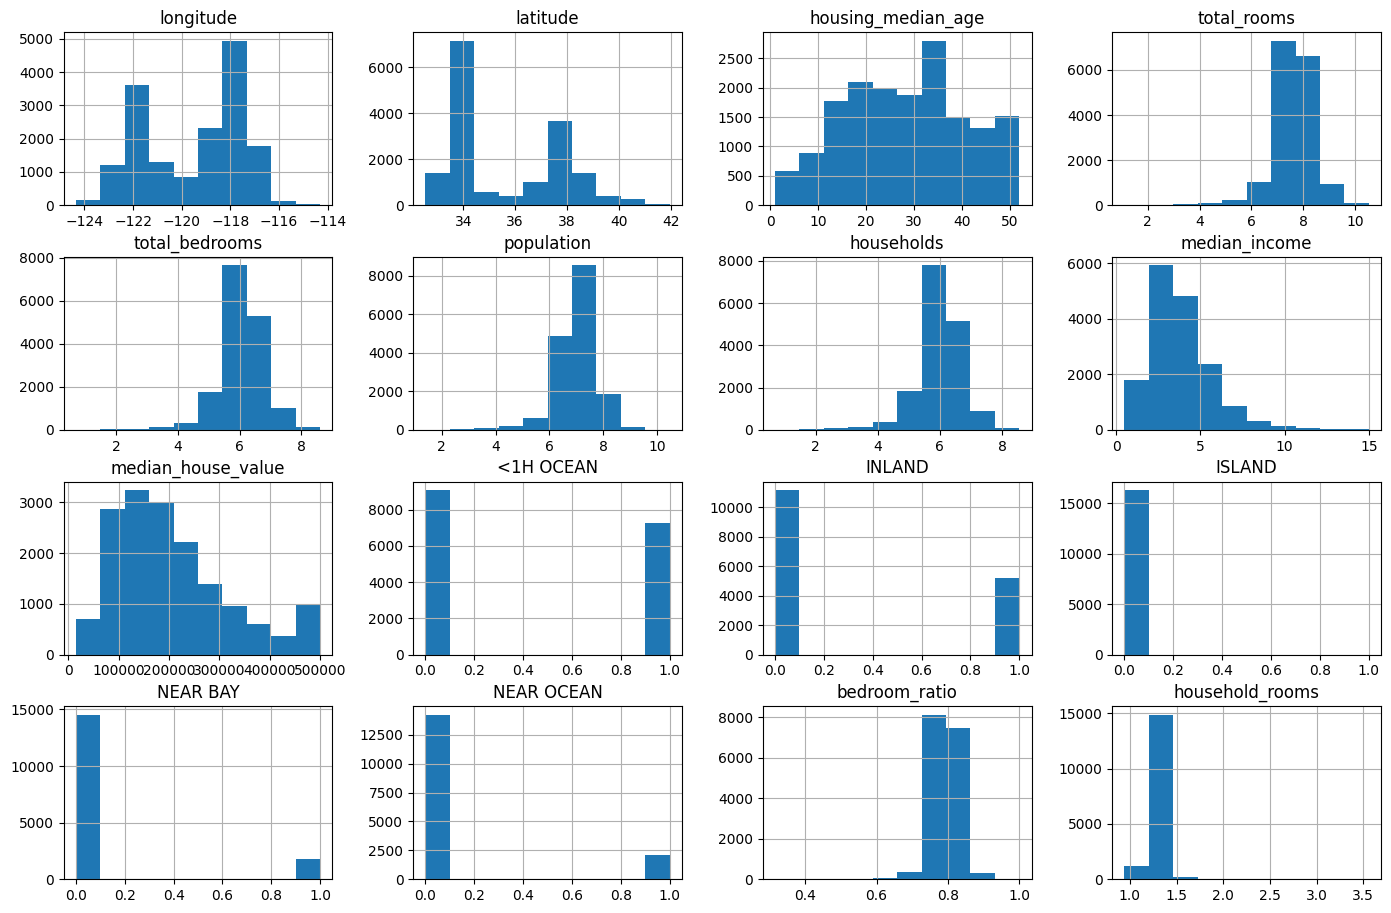

In [40]:
# Visualizing distributions of features in the training data after log transformation

training_data.hist(figsize=(17, 11))
plt.show()

In [13]:
training_data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     7256
INLAND        5180
NEAR OCEAN    2100
NEAR BAY      1806
ISLAND           4
Name: count, dtype: int64

In [14]:
# One-hot encoding for the 'ocean_proximity' categorical feature

training_data = training_data.join(pd.get_dummies(training_data["ocean_proximity"], dtype=int)).drop("ocean_proximity", axis=1)

In [15]:
training_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
3185,-119.79,36.30,16.0,7.448916,5.627621,6.806829,5.669881,4.3438,93100.0,0,1,0,0,0
3358,-120.66,40.41,52.0,7.641084,6.171701,6.958448,6.040255,2.2992,70200.0,0,1,0,0,0
1189,-121.52,39.43,15.0,7.659171,5.966147,6.984716,5.926926,2.3566,80400.0,0,1,0,0,0
19422,-121.04,37.70,52.0,5.857933,4.094345,4.804021,3.713572,3.3036,197500.0,0,1,0,0,0
5713,-118.25,34.22,34.0,7.828436,6.284134,7.324490,6.297109,3.8068,267000.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13370,-117.54,34.12,4.0,9.774403,7.944492,8.957639,7.813592,5.1333,181800.0,0,1,0,0,0
5684,-118.28,33.68,8.0,7.952615,6.259581,7.393263,6.236370,3.7282,287500.0,0,0,0,0,1
12882,-121.34,38.67,34.0,7.315884,5.579730,6.595781,5.655992,4.0352,118500.0,0,1,0,0,0
9524,-123.17,39.18,14.0,7.714677,5.793014,6.938284,5.733341,5.9585,214900.0,1,0,0,0,0


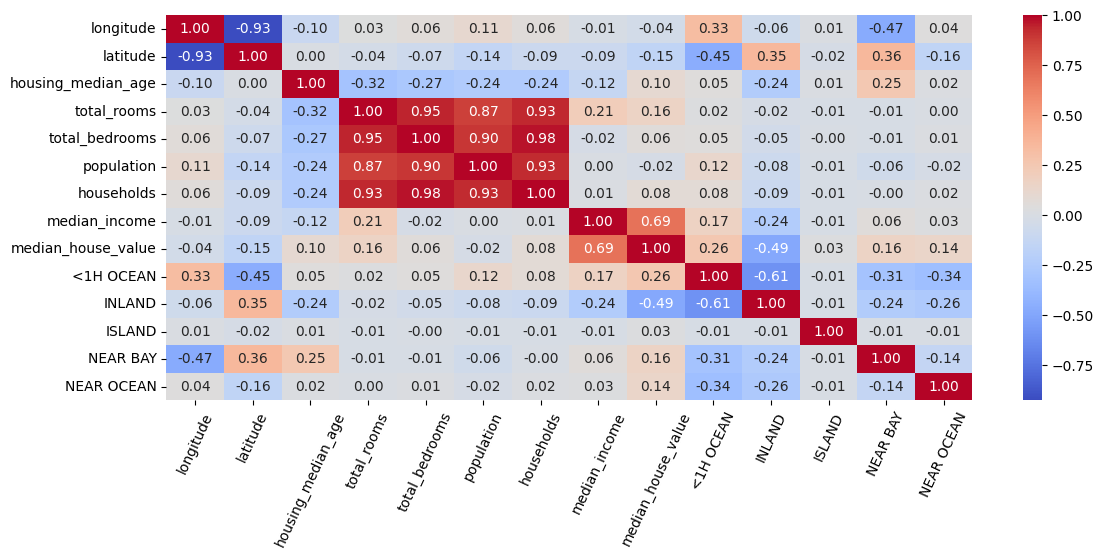

In [16]:
# Correlation heatmap of numerical features in the training data

plt.figure(figsize=(13, 5))
sns.heatmap(training_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.xticks(rotation=65)
plt.show()

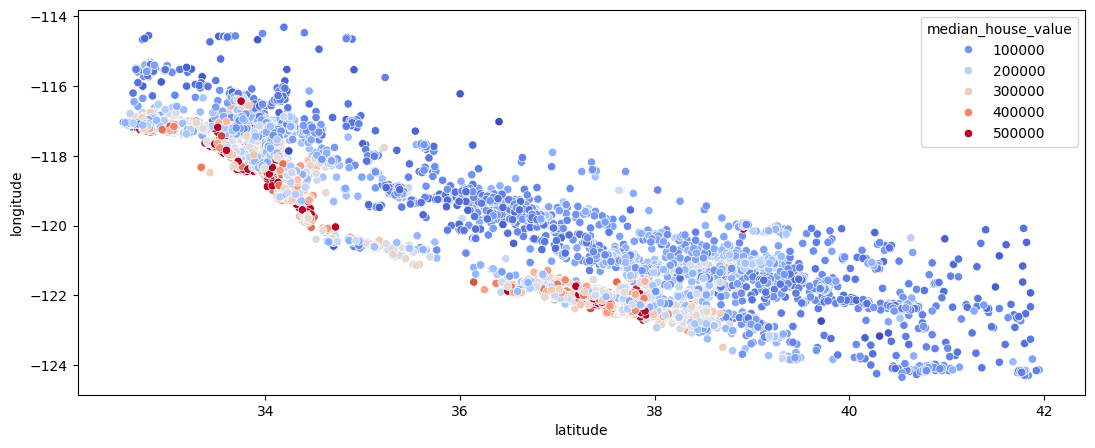

In [17]:
# 
plt.figure(figsize=(13, 5))
sns.scatterplot(x="latitude", y="longitude", data=training_data, hue="median_house_value", palette="coolwarm")
plt.show()

## Feature Engineering

In [18]:
training_data["bedroom_ratio"] = training_data["total_bedrooms"]/training_data["total_rooms"]
training_data["household_rooms"] = training_data["total_rooms"]/training_data["households"]

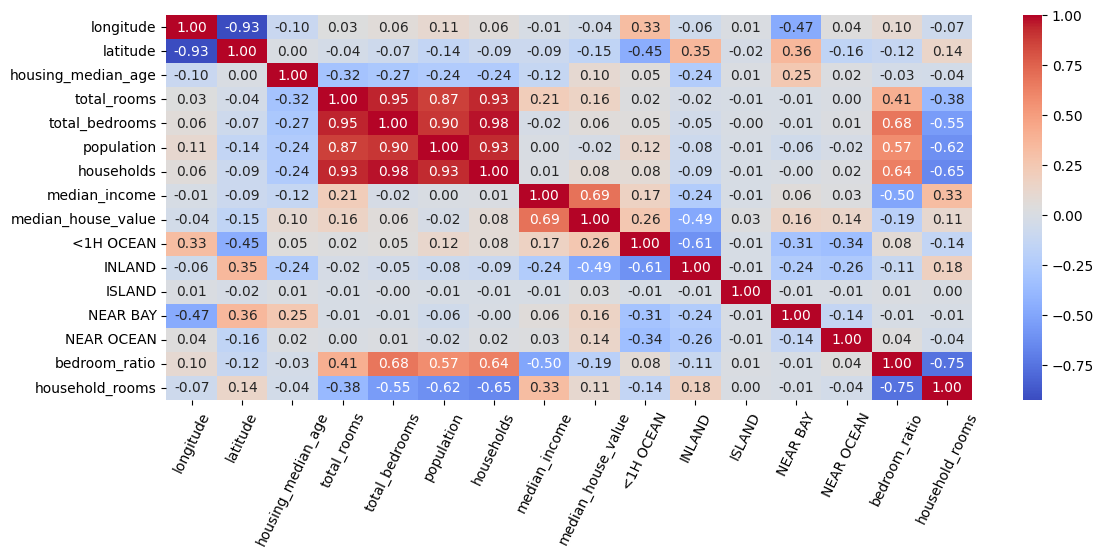

In [19]:
# Use heatmap to see correlations again
plt.figure(figsize=(13, 5))
sns.heatmap(training_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.xticks(rotation=64)
plt.show()

## Model Building

In [20]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
3185,-119.79,36.30,16.0,1717.0,277.0,903.0,289.0,4.3438,INLAND
3358,-120.66,40.41,52.0,2081.0,478.0,1051.0,419.0,2.2992,INLAND
1189,-121.52,39.43,15.0,2119.0,389.0,1079.0,374.0,2.3566,INLAND
19422,-121.04,37.70,52.0,349.0,59.0,121.0,40.0,3.3036,INLAND
5713,-118.25,34.22,34.0,2510.0,535.0,1516.0,542.0,3.8068,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
13370,-117.54,34.12,4.0,17577.0,2819.0,7766.0,2473.0,5.1333,INLAND
5684,-118.28,33.68,8.0,2842.0,522.0,1624.0,510.0,3.7282,NEAR OCEAN
12882,-121.34,38.67,34.0,1503.0,264.0,731.0,285.0,4.0352,INLAND
9524,-123.17,39.18,14.0,2240.0,327.0,1030.0,308.0,5.9585,<1H OCEAN


In [21]:
X_train, y_train = training_data.drop(["median_house_value"], axis=1), training_data["median_house_value"]

In [22]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
3185,-119.79,36.30,16.0,7.448916,5.627621,6.806829,5.669881,4.3438,0,1,0,0,0,0.755495,1.313769
3358,-120.66,40.41,52.0,7.641084,6.171701,6.958448,6.040255,2.2992,0,1,0,0,0,0.807700,1.265027
1189,-121.52,39.43,15.0,7.659171,5.966147,6.984716,5.926926,2.3566,0,1,0,0,0,0.778955,1.292267
19422,-121.04,37.70,52.0,5.857933,4.094345,4.804021,3.713572,3.3036,0,1,0,0,0,0.698940,1.577439
5713,-118.25,34.22,34.0,7.828436,6.284134,7.324490,6.297109,3.8068,1,0,0,0,0,0.802732,1.243179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13370,-117.54,34.12,4.0,9.774403,7.944492,8.957639,7.813592,5.1333,0,1,0,0,0,0.812785,1.250949
5684,-118.28,33.68,8.0,7.952615,6.259581,7.393263,6.236370,3.7282,0,0,0,0,1,0.787110,1.275199
12882,-121.34,38.67,34.0,7.315884,5.579730,6.595781,5.655992,4.0352,0,1,0,0,0,0.762687,1.293475
9524,-123.17,39.18,14.0,7.714677,5.793014,6.938284,5.733341,5.9585,1,0,0,0,0,0.750908,1.345581


In [ ]:
model = LinearRegression().fit(X_train, y_train)

In [24]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14304,-117.14,32.71,52.0,1225.0,332.0,955.0,321.0,1.6011,NEAR OCEAN
5051,-118.34,34.01,35.0,1359.0,359.0,655.0,341.0,2.5568,<1H OCEAN
479,-122.28,37.86,52.0,3007.0,691.0,1582.0,636.0,2.5652,NEAR BAY
14027,-117.15,32.76,37.0,1921.0,502.0,811.0,472.0,2.7500,NEAR OCEAN
15243,-117.25,33.00,14.0,2518.0,458.0,931.0,414.0,5.8393,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
17491,-119.83,34.43,31.0,798.0,346.0,699.0,301.0,2.1417,NEAR OCEAN
1109,-121.60,39.83,12.0,3744.0,699.0,1532.0,660.0,2.3079,INLAND
17537,-121.89,37.35,47.0,2879.0,631.0,2229.0,606.0,3.2599,<1H OCEAN
15097,-116.94,32.82,35.0,1737.0,285.0,826.0,294.0,3.2411,<1H OCEAN


In [25]:
testing_data = X_test.join(y_test)

# Take the natural logarithm of the same features in the test set
testing_data["total_rooms"] = np.log(testing_data["total_rooms"] + 1)
testing_data["total_bedrooms"] = np.log(testing_data["total_bedrooms"] + 1)
testing_data["population"] = np.log(testing_data["population"] + 1)
testing_data["households"] = np.log(testing_data["households"] + 1)

# One-hot encoding for categorical feature in test set
testing_data = testing_data.join(pd.get_dummies(testing_data["ocean_proximity"], dtype=int)).drop(["ocean_proximity"], axis=1)

# Same feature engineering on test set
testing_data["bedroom_ratio"] = testing_data["total_bedrooms"]/testing_data["total_rooms"]
testing_data["household_rooms"] = testing_data["total_rooms"]/testing_data["households"]

In [26]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14304,-117.14,32.71,52.0,1225.0,332.0,955.0,321.0,1.6011,NEAR OCEAN
5051,-118.34,34.01,35.0,1359.0,359.0,655.0,341.0,2.5568,<1H OCEAN
479,-122.28,37.86,52.0,3007.0,691.0,1582.0,636.0,2.5652,NEAR BAY
14027,-117.15,32.76,37.0,1921.0,502.0,811.0,472.0,2.7500,NEAR OCEAN
15243,-117.25,33.00,14.0,2518.0,458.0,931.0,414.0,5.8393,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
17491,-119.83,34.43,31.0,798.0,346.0,699.0,301.0,2.1417,NEAR OCEAN
1109,-121.60,39.83,12.0,3744.0,699.0,1532.0,660.0,2.3079,INLAND
17537,-121.89,37.35,47.0,2879.0,631.0,2229.0,606.0,3.2599,<1H OCEAN
15097,-116.94,32.82,35.0,1737.0,285.0,826.0,294.0,3.2411,<1H OCEAN


In [27]:
X_test, y_test = testing_data.drop(["median_house_value"], axis=1), testing_data["median_house_value"]

In [28]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
14304,-117.14,32.71,52.0,7.111512,5.808142,6.862758,5.774552,1.6011,0,0,0,0,1,0.816724,1.231526
5051,-118.34,34.01,35.0,7.215240,5.886104,6.486161,5.834811,2.5568,1,0,0,0,0,0.815788,1.236585
479,-122.28,37.86,52.0,8.009031,6.539586,7.367077,6.456770,2.5652,0,0,0,1,0,0.816527,1.240408
14027,-117.15,32.76,37.0,7.561122,6.220590,6.699500,6.159095,2.7500,0,0,0,0,1,0.822707,1.227635
15243,-117.25,33.00,14.0,7.831617,6.129050,6.837333,6.028279,5.8393,0,0,0,0,1,0.782603,1.299147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17491,-119.83,34.43,31.0,6.683361,5.849325,6.551080,5.710427,2.1417,0,0,0,0,1,0.875207,1.170378
1109,-121.60,39.83,12.0,8.228177,6.551080,7.334982,6.493754,2.3079,0,1,0,0,0,0.796176,1.267091
17537,-121.89,37.35,47.0,7.965546,6.448889,7.709757,6.408529,3.2599,1,0,0,0,0,0.809598,1.242960
15097,-116.94,32.82,35.0,7.460490,5.655992,6.717805,5.686975,3.2411,1,0,0,0,0,0.758126,1.311856


In [29]:
model.score(X_test, y_test)

0.6551315936157593

In [ ]:
model_1 = RandomForestRegressor().fit(X_train, y_train)

In [31]:
model_1.score(X_test, y_test)

0.8181237712609967

In [ ]:
# Hyperparameter tuning using GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [3,10,30],
    "max_features": [2,4,6,8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestRegressor()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_features': [2, 4, ...], 'n_estimators': [3, 10, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also 

In [ ]:
# Get the best parameters from the grid search
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [ ]:
#now evaluate the best model from grid search on the test set
grid_search.best_estimator_.score(X_test, y_test)

0.8202932552202657